In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Loading the datasets
file_path1 = 'missile_attacks_daily.csv'
file_path2 = 'missiles_and_uav.csv'

with open(file_path1, 'r') as file1:
    missile_attacks_daily = pd.read_csv(file1)

with open(file_path2, 'r') as file2:
    missiles_and_uav = pd.read_csv(file2)


# Displaying the first few rows of each dataset for an initial understanding
missile_attacks_daily_head = missile_attacks_daily.head()
missiles_and_uav_head = missiles_and_uav.head()

missile_attacks_daily_head, missiles_and_uav_head


(         time_start          time_end               model launch_place  \
 0        2022-09-28        2022-09-28                X-59          NaN   
 1        2022-09-28        2022-09-28  Reconnaissance UAV          NaN   
 2  2022-09-29 23:00  2022-09-29 23:59      Shahed-136/131          NaN   
 3        2022-09-30        2022-09-30            Orlan-10          NaN   
 4  2022-10-01 12:00  2022-10-01 12:00            Orlan-10          NaN   
 
                                           target target_details carrier  \
 0  Dnipropetrovsk oblast and Zaporizhzhia oblast            NaN   Su-35   
 1                                        Ukraine            NaN     NaN   
 2               Odesa oblast and Mykolaiv oblast            NaN     NaN   
 3                                        Ukraine            NaN     NaN   
 4                                        Ukraine            NaN     NaN   
 
    launched  destroyed                                             source  
 0         5 

In [4]:

# Exploring the missile_attacks_daily dataset
missile_attacks_daily.info()

# Exploring the missiles_and_uav dataset
missiles_and_uav.info()

# Checking for missing values
missile_attacks_daily.isnull().sum()
missiles_and_uav.isnull().sum()

# Checking for duplicate rows
missile_attacks_daily.duplicated().sum()
missiles_and_uav.duplicated().sum()

# Checking the data types of each column
missile_attacks_daily.dtypes
missiles_and_uav.dtypes

# Checking the unique values in each column
missile_attacks_daily.nunique()
missiles_and_uav.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   time_start      578 non-null    object
 1   time_end        578 non-null    object
 2   model           578 non-null    object
 3   launch_place    309 non-null    object
 4   target          550 non-null    object
 5   target_details  3 non-null      object
 6   carrier         131 non-null    object
 7   launched        578 non-null    int64 
 8   destroyed       578 non-null    int64 
 9   source          578 non-null    object
dtypes: int64(2), object(8)
memory usage: 45.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   model            33 non-null     object
 1   category         33 non-null     object
 2   type             25 non-null 

model              33
category            5
type               11
national_origin     2
launch_platform    10
name               15
name_NATO          11
guidance_system     2
manufacturer        7
dtype: int64

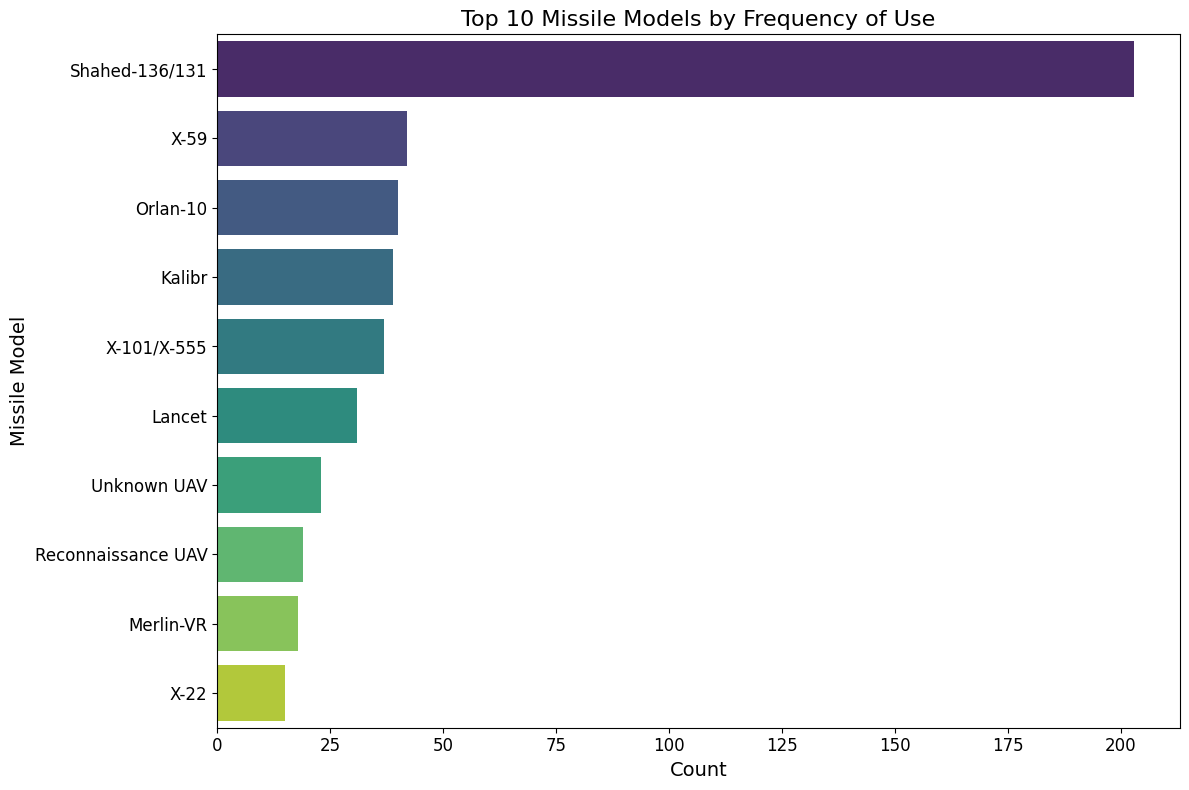

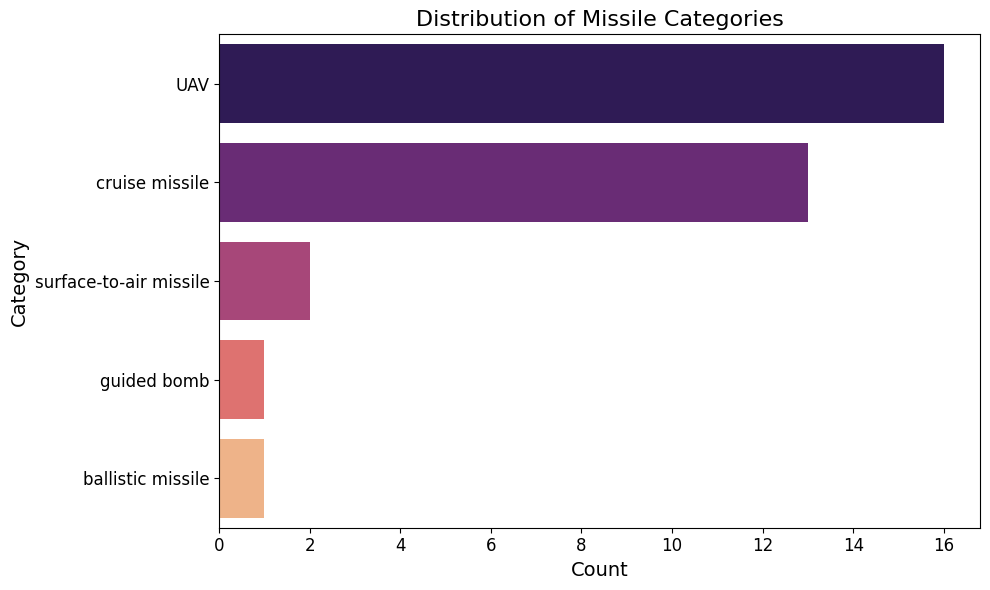

(                Model  Count
 0      Shahed-136/131    203
 1                X-59     42
 2            Orlan-10     40
 3              Kalibr     39
 4         X-101/X-555     37
 5              Lancet     31
 6         Unknown UAV     23
 7  Reconnaissance UAV     19
 8           Merlin-VR     18
 9                X-22     15,
                  Category  Count
 0                     UAV     16
 1          cruise missile     13
 2  surface-to-air missile      2
 3             guided bomb      1
 4       ballistic missile      1)

In [ ]:
# Analyzing the missile_attacks_daily dataset for more insights

# Grouping data by missile model and counting the number of occurrences
model_counts = missile_attacks_daily['model'].value_counts().reset_index()
model_counts.columns = ['Model', 'Count']

# Taking the top 10 most frequent missile models for visualization
top_models = model_counts.head(10)

# Plotting the frequency of the top 10 missile models
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Model', data=top_models, palette='viridis')
plt.title('Top 10 Missile Models by Frequency of Use', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Missile Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Analyzing the missiles_and_uav dataset for category distribution
category_counts = missiles_and_uav['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Plotting the distribution of missile categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Category', data=category_counts, palette='magma')
plt.title('Distribution of Missile Categories', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

top_models, category_counts


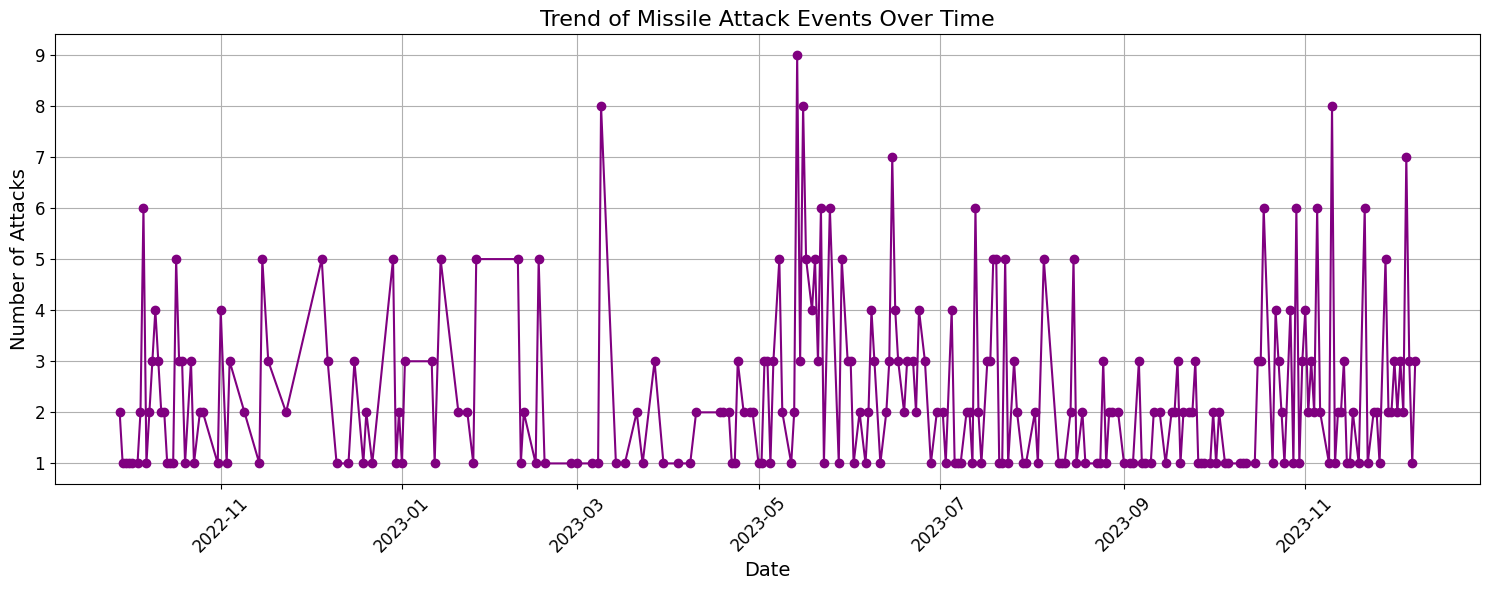

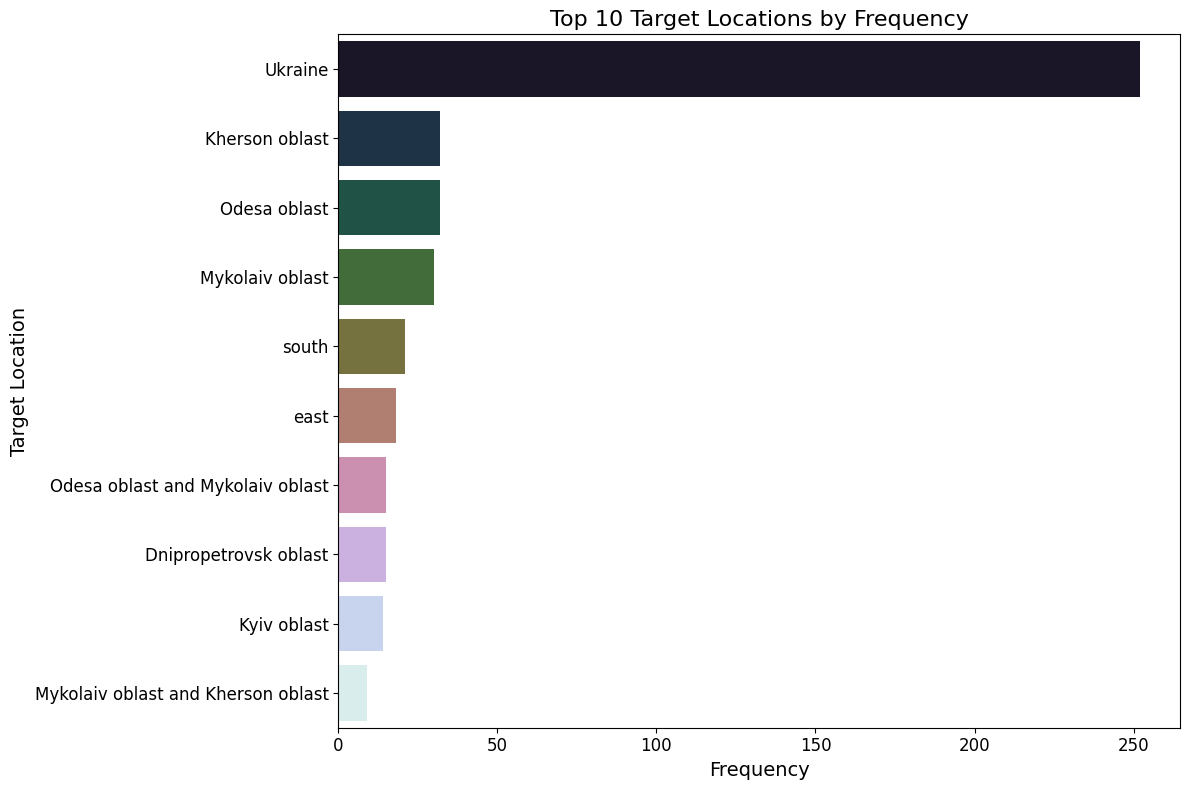

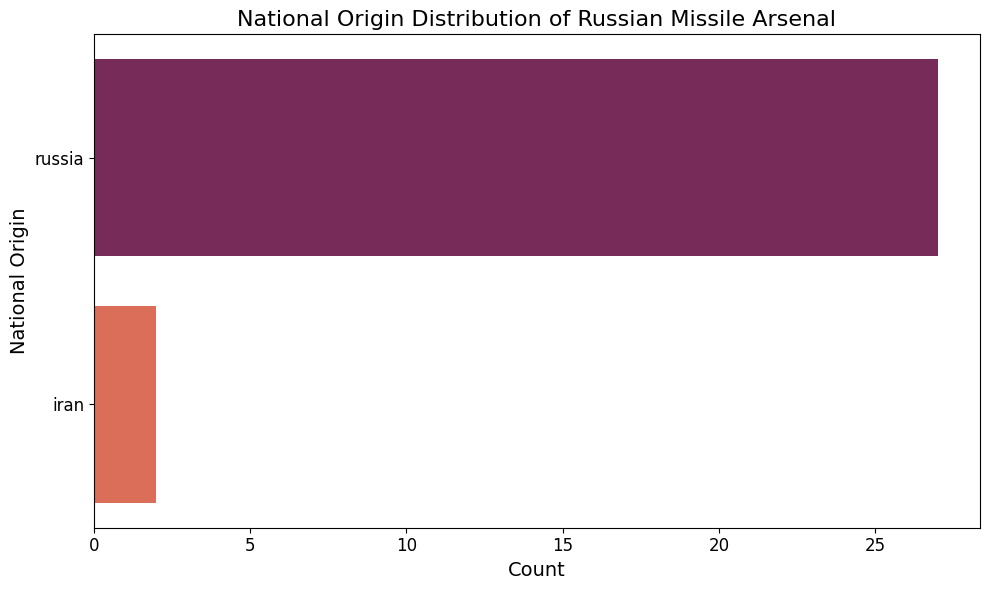

(     time_start  Attacks
 0    2022-09-28        2
 1    2022-09-29        1
 2    2022-09-30        1
 3    2022-10-01        1
 4    2022-10-02        1
 ..          ...      ...
 241  2023-12-04        2
 242  2023-12-05        7
 243  2023-12-06        3
 244  2023-12-07        1
 245  2023-12-08        3
 
 [246 rows x 2 columns],
                       Target Location  Frequency
 0                             Ukraine        252
 1                      Kherson oblast         32
 2                        Odesa oblast         32
 3                     Mykolaiv oblast         30
 4                               south         21
 5                                east         18
 6    Odesa oblast and Mykolaiv oblast         15
 7               Dnipropetrovsk oblast         15
 8                         Kyiv oblast         14
 9  Mykolaiv oblast and Kherson oblast          9,
   National Origin  Count
 0          russia     27
 1            iran      2)

In [5]:
# Further exploratory data analysis on the datasets

# Analysis 1: Time trend of missile attacks
# Converting time_start to datetime in missile_attacks_daily for trend analysis
missile_attacks_daily['time_start'] = pd.to_datetime(missile_attacks_daily['time_start'])
# Grouping by date and counting the number of attacks
date_trend = missile_attacks_daily.groupby(missile_attacks_daily['time_start'].dt.date).size().reset_index(name='Attacks')

# Analysis 2: Target locations frequency
# Counting the frequency of target locations
target_frequency = missile_attacks_daily['target'].value_counts().reset_index()
target_frequency.columns = ['Target Location', 'Frequency']
top_targets = target_frequency.head(10)  # Top 10 target locations

# Analysis 3: National origin of missiles in missiles_and_uav dataset
national_origin_distribution = missiles_and_uav['national_origin'].value_counts().reset_index()
national_origin_distribution.columns = ['National Origin', 'Count']

# Plotting the findings

# Plot 1: Time trend of missile attacks
plt.figure(figsize=(15, 6))
plt.plot(date_trend['time_start'], date_trend['Attacks'], marker='o', color='purple')
plt.title('Trend of Missile Attack Events Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Top 10 target locations
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Target Location', data=top_targets, palette='cubehelix')
plt.title('Top 10 Target Locations by Frequency', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Target Location', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Plot 3: National origin of missiles
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='National Origin', data=national_origin_distribution, palette='rocket')
plt.title('National Origin Distribution of Russian Missile Arsenal', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('National Origin', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

date_trend, top_targets, national_origin_distribution




March 9, 2023

The United States sanctioned five companies and one woman based in China for supporting Iran’s efforts to procure drone components. The network was linked to Iran Aircraft Manufacturing Industrial Company (HESA), which produced Shahed-136 suicide drones. The unmanned aerial vehicles (UAVs) were used by Iran to attack oil tankers and exported to Russia for the war in Ukraine. “Iran is directly implicated in the Ukrainian civilian casualties that result from Russia’s use of Iranian UAVs in Ukraine,” said Under Secretary of the Treasury Brian Nelson. “The United States will continue to target global Iranian procurement networks that supply Russia with deadly UAVs for use in its illegal war in Ukraine.”




March 21, 2023

The United States sanctioned three men and four organizations that procured equipment for Iran’s drone and weapons programs. The network, based in Iran and Turkey, had links to the Ministry of Defense. One firm was owned by the ministry. Two of the men tried to acquire European-made engines that could propel unmanned aerial vehicles (UAVs) and surface-to-air missiles. The United States will “expose foreign procurement networks in any jurisdiction” that support Iran’s military, said Under Secretary of the Treasury Brian Nelson. Tehran’s “well-documented proliferation of UAVs and conventional weapons to its proxies continues to undermine both regional security and global stability.”

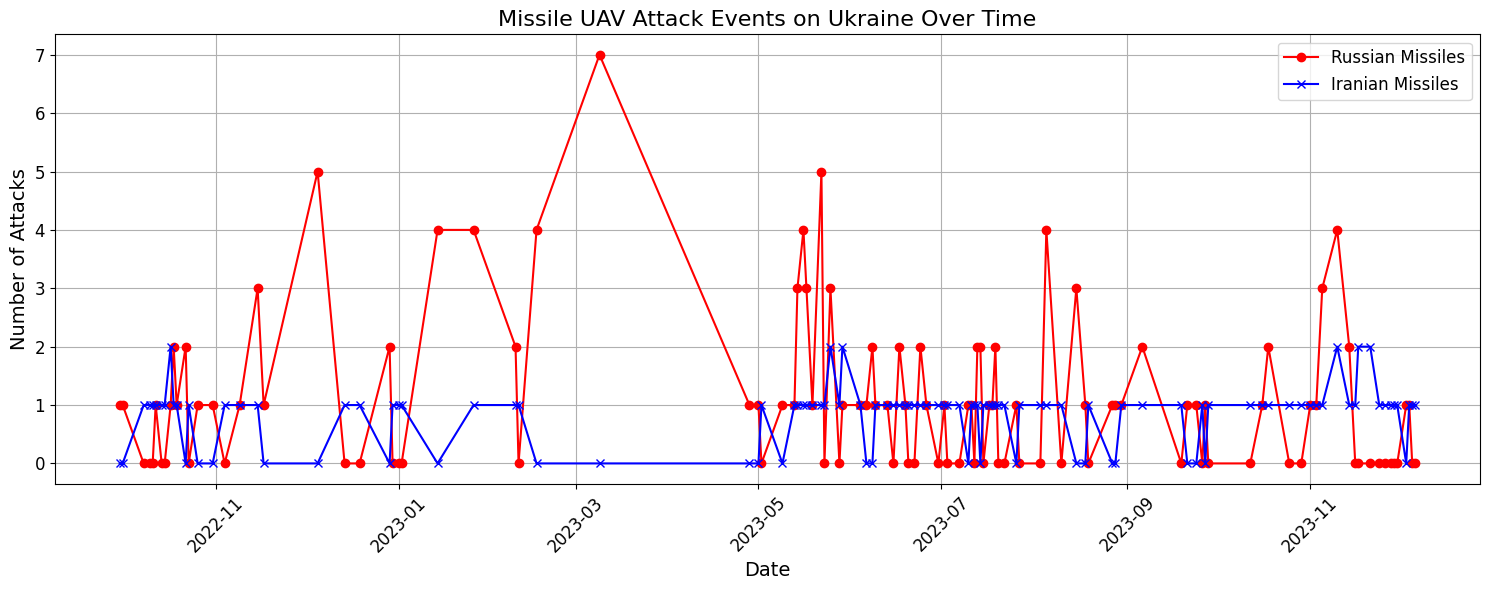

national_origin,iran,russia
time_start,,
2022-09-30,0.0,1.0
2022-10-01,0.0,1.0
2022-10-08,1.0,0.0
2022-10-10,1.0,0.0
2022-10-11,1.0,0.0


In [ ]:
# Filtering the data for Russian and Iranian missiles and their usage on Ukraine

# Filtering Russian and Iranian missiles from missiles_and_uav dataset
russian_iranian_missiles = missiles_and_uav[missiles_and_uav['national_origin'].isin(['russia', 'iran'])]

# Filtering missile attacks in Ukraine from missile_attacks_daily dataset
attacks_in_ukraine = missile_attacks_daily[missile_attacks_daily['target'].str.contains("Ukraine", case=False, na=False)]

# Merging the datasets to get the origin of missiles used in attacks on Ukraine
ukraine_attacks_with_origin = pd.merge(attacks_in_ukraine, russian_iranian_missiles, left_on='model', right_on='model', how='inner')

# Grouping by date and national origin to count the number of attacks
origin_time_trend = ukraine_attacks_with_origin.groupby([ukraine_attacks_with_origin['time_start'].dt.date, 'national_origin']).size().reset_index(name='Attacks')

# Pivoting the data for time series comparison
pivot_origin_time_trend = origin_time_trend.pivot(index='time_start', columns='national_origin', values='Attacks').fillna(0)

# Plotting the time series comparison
plt.figure(figsize=(15, 6))
plt.plot(pivot_origin_time_trend.index, pivot_origin_time_trend['russia'], label='Russian Missiles', marker='o', color='red')
plt.plot(pivot_origin_time_trend.index, pivot_origin_time_trend['iran'], label='Iranian Missiles', marker='x', color='blue')
plt.title('Missile UAV Attack Events on Ukraine Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

pivot_origin_time_trend.head()


The period where the lack of Iranian Missiles used may be evident of the success of US sanctions on Iran.

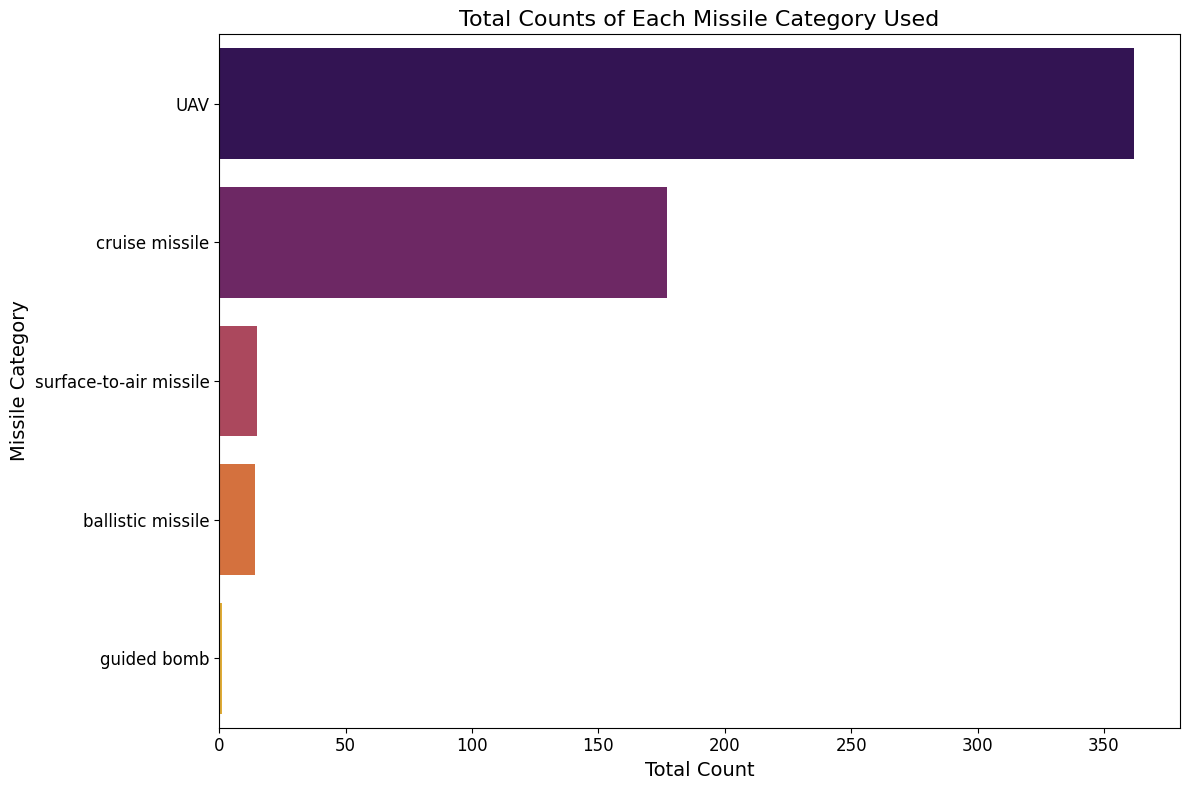

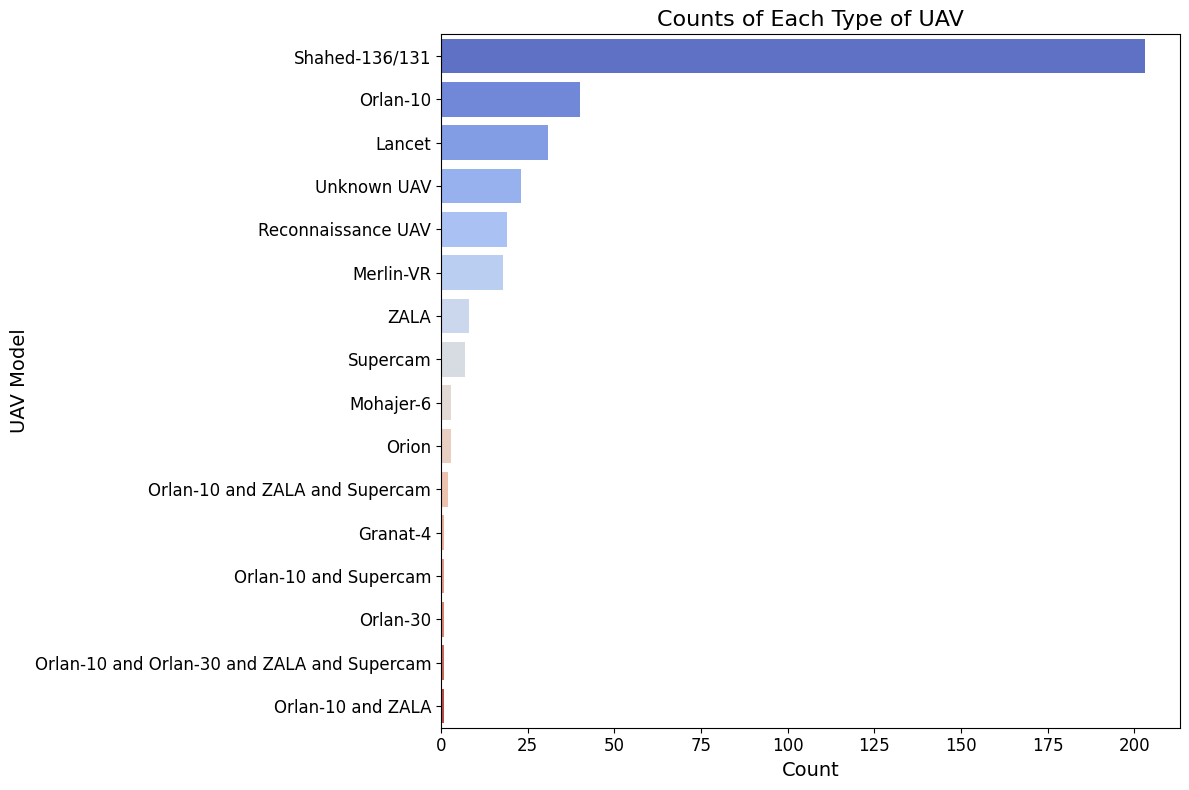

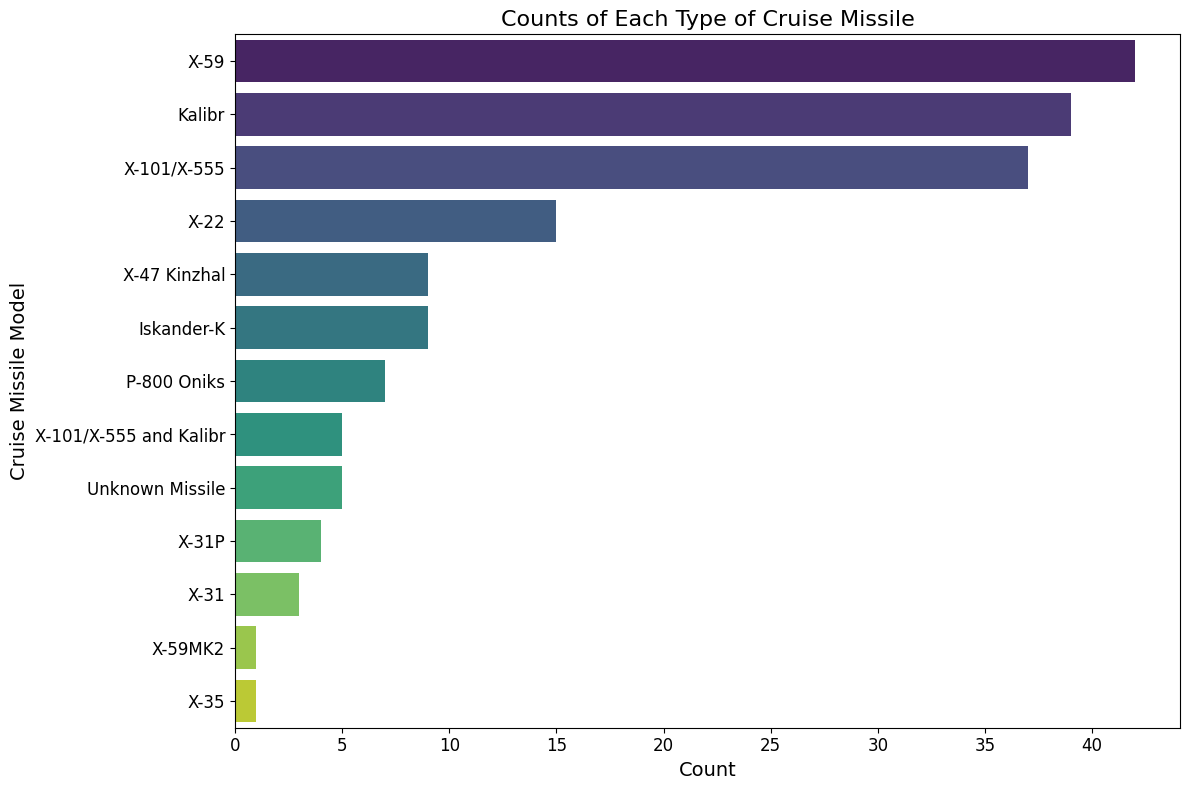

,Cruise Missile Model,Count
0,X-59,42
1,Kalibr,39
2,X-101/X-555,37
3,X-22,15
4,X-47 Kinzhal,9
5,Iskander-K,9
6,P-800 Oniks,7
7,X-101/X-555 and Kalibr,5
8,Unknown Missile,5
9,X-31P,4


In [ ]:
# Calculating the total counts of each missile category used in the missile_attacks_daily dataset

# Merging the missile_attacks_daily dataset with the missiles_and_uav dataset to get the category of each missile
merged_missile_data = pd.merge(missile_attacks_daily, missiles_and_uav[['model', 'category']], on='model', how='left')

# Counting the frequency of each missile category
category_counts = merged_missile_data['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Total Count']

# Plotting the total counts of each missile category
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Count', y='Category', data=category_counts, palette='inferno')
plt.title('Total Counts of Each Missile Category Used', fontsize=16)
plt.xlabel('Total Count', fontsize=14)
plt.ylabel('Missile Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

category_counts

# Drilling down to the types of UAVs and finding the counts of each

# Filtering the dataset for UAV category
uav_data = merged_missile_data[merged_missile_data['category'] == 'UAV']

# Counting the frequency of each type of UAV
uav_type_counts = uav_data['model'].value_counts().reset_index()
uav_type_counts.columns = ['UAV Model', 'Count']

# Plotting the counts of each type of UAV
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='UAV Model', data=uav_type_counts, palette='coolwarm')
plt.title('Counts of Each Type of UAV', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('UAV Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

uav_type_counts

# Drilling down to the types of cruise missiles and finding the counts of each

# Filtering the dataset for the cruise missile category
cruise_missile_data = merged_missile_data[merged_missile_data['category'] == 'cruise missile']

# Counting the frequency of each type of cruise missile
cruise_missile_type_counts = cruise_missile_data['model'].value_counts().reset_index()
cruise_missile_type_counts.columns = ['Cruise Missile Model', 'Count']

# Plotting the counts of each type of cruise missile
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Cruise Missile Model', data=cruise_missile_type_counts, palette='viridis')
plt.title('Counts of Each Type of Cruise Missile', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Cruise Missile Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

cruise_missile_type_counts



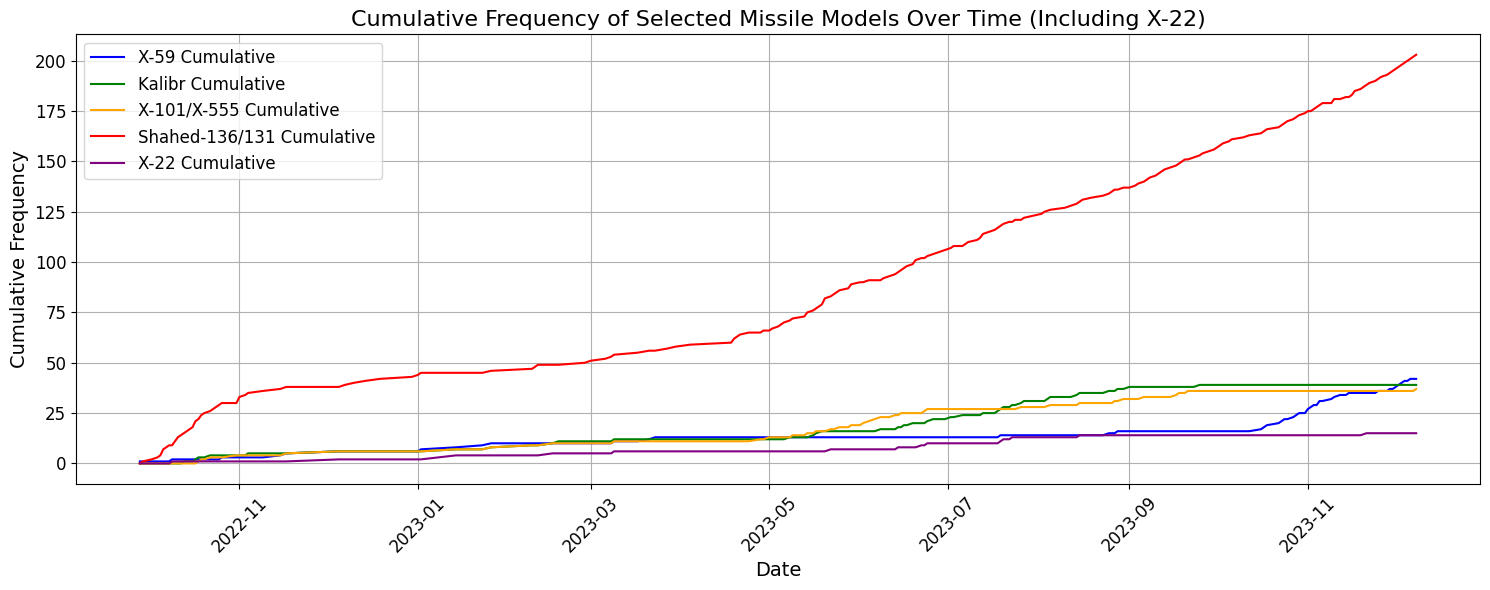

In [ ]:
# Including the X-22 missile in the cumulative frequency analysis

# Adding X-22 to the list of selected models
selected_models_with_x22 = ['X-59', 'Kalibr', 'X-101/X-555', 'Shahed-136/131', 'X-22']
selected_missile_data_with_x22 = missile_attacks_daily[missile_attacks_daily['model'].isin(selected_models_with_x22)]

# Grouping data by date and model to count the frequency of each missile model
model_time_series_with_x22 = selected_missile_data_with_x22.groupby([selected_missile_data_with_x22['time_start'].dt.date, 'model']).size().reset_index(name='Frequency')

# Pivoting the data for time series comparison
pivot_model_time_series_with_x22 = model_time_series_with_x22.pivot(index='time_start', columns='model', values='Frequency').fillna(0)

# Creating a cumulative sum for each model including X-22
pivot_model_time_series_with_x22['X-59_cumulative'] = pivot_model_time_series_with_x22['X-59'].cumsum()
pivot_model_time_series_with_x22['Kalibr_cumulative'] = pivot_model_time_series_with_x22['Kalibr'].cumsum()
pivot_model_time_series_with_x22['X-101/X-555_cumulative'] = pivot_model_time_series_with_x22['X-101/X-555'].cumsum()
pivot_model_time_series_with_x22['Shahed-136/131_cumulative'] = pivot_model_time_series_with_x22['Shahed-136/131'].cumsum()
pivot_model_time_series_with_x22['X-22_cumulative'] = pivot_model_time_series_with_x22['X-22'].cumsum()

# Plotting the cumulative frequency time series including X-22
plt.figure(figsize=(15, 6))
plt.plot(pivot_model_time_series_with_x22.index, pivot_model_time_series_with_x22['X-59_cumulative'], label='X-59 Cumulative', color='blue')
plt.plot(pivot_model_time_series_with_x22.index, pivot_model_time_series_with_x22['Kalibr_cumulative'], label='Kalibr Cumulative', color='green')
plt.plot(pivot_model_time_series_with_x22.index, pivot_model_time_series_with_x22['X-101/X-555_cumulative'], label='X-101/X-555 Cumulative', color='orange')
plt.plot(pivot_model_time_series_with_x22.index, pivot_model_time_series_with_x22['Shahed-136/131_cumulative'], label='Shahed-136/131 Cumulative', color='red')
plt.plot(pivot_model_time_series_with_x22.index, pivot_model_time_series_with_x22['X-22_cumulative'], label='X-22 Cumulative', color='purple')

plt.title('Cumulative Frequency of Selected Missile Models Over Time (Including X-22)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-28-00ad30ff9739>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uav_recon_events['time_start'] = pd.to_datetime(uav_recon_events['time_start'])
<ipython-input-28-00ad30ff9739>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cruise_missile_events['time_start'] = pd.to_datetime(cruise_missile_events['time_start'])
<ipython-input-28-00ad30ff9739>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

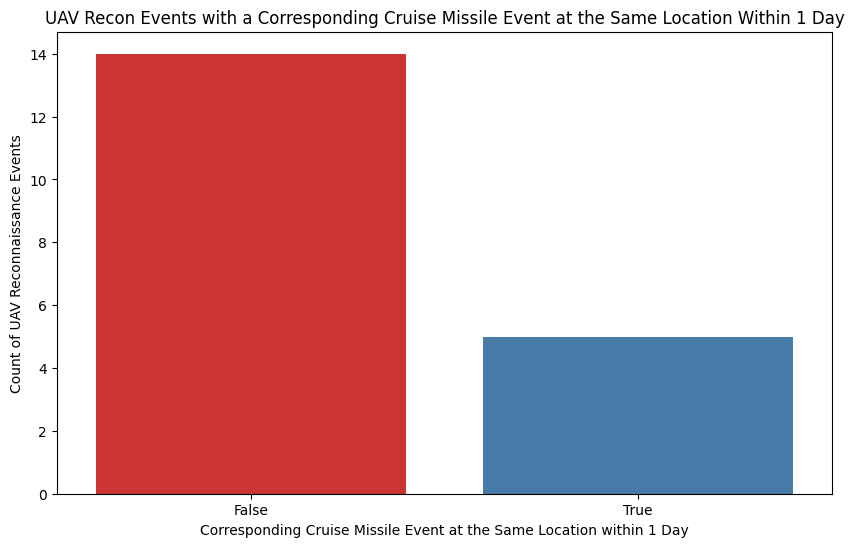

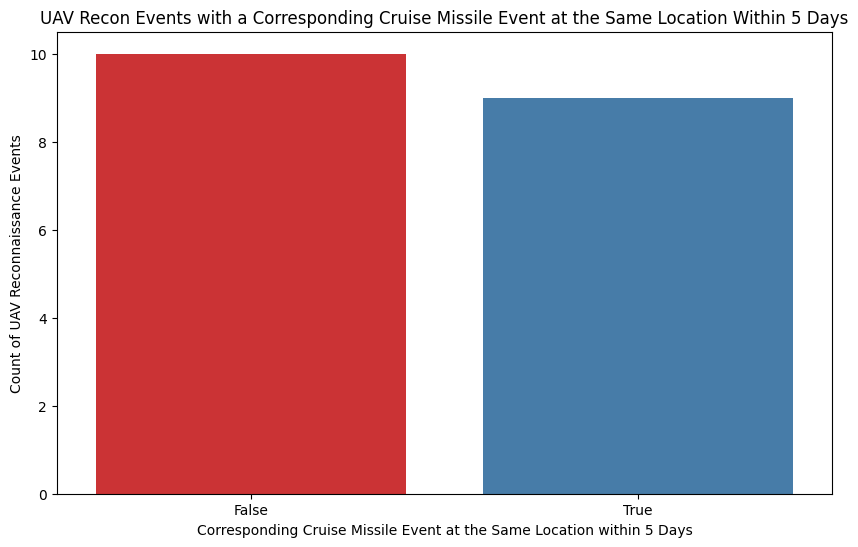

In [ ]:
import datetime as dt

# Function to check for a corresponding cruise missile event within a specified number of days
def check_corresponding_event(uav_event, cruise_missile_events, days):
    uav_date = uav_event['time_start']
    uav_target = uav_event['target']
    corresponding_event = cruise_missile_events[
        (cruise_missile_events['time_start'] >= uav_date) &
        (cruise_missile_events['time_start'] <= uav_date + dt.timedelta(days=days)) &
        (cruise_missile_events['target'] == uav_target)
    ]
    return corresponding_event.shape[0] > 0


# Merging the datasets to get the category information
merged_data = pd.merge(missile_attacks_daily, missiles_and_uav[['model', 'category']], on='model', how='left')

# Filtering for UAV reconnaissance and cruise missile events
uav_recon_events = merged_data[(merged_data['model'].str.contains("Reconnaissance UAV", case=False, na=False)) & (merged_data['category'] == 'UAV')]
cruise_missile_events = merged_data[merged_data['category'].str.contains("cruise missile", case=False, na=False)]

# Converting time_start to datetime
uav_recon_events['time_start'] = pd.to_datetime(uav_recon_events['time_start'])
cruise_missile_events['time_start'] = pd.to_datetime(cruise_missile_events['time_start'])

# Applying the function for the 1-day and 5-day analyses
uav_recon_events['Corresponding Cruise Missile Event 1 Day'] = uav_recon_events.apply(check_corresponding_event, axis=1, cruise_missile_events=cruise_missile_events, days=1)
uav_recon_events['Corresponding Cruise Missile Event 5 Days'] = uav_recon_events.apply(check_corresponding_event, axis=1, cruise_missile_events=cruise_missile_events, days=5)

# Visualizing the results for the 1-day window
plt.figure(figsize=(10, 6))
sns.countplot(x='Corresponding Cruise Missile Event 1 Day', data=uav_recon_events, palette='Set1')
plt.title('UAV Recon Events with a Corresponding Cruise Missile Event at the Same Location Within 1 Day')
plt.xlabel('Corresponding Cruise Missile Event at the Same Location within 1 Day')
plt.ylabel('Count of UAV Reconnaissance Events')
plt.show()

# Visualizing the results for the 5-day window
plt.figure(figsize=(10, 6))
sns.countplot(x='Corresponding Cruise Missile Event 5 Days', data=uav_recon_events, palette='Set1')
plt.title('UAV Recon Events with a Corresponding Cruise Missile Event at the Same Location Within 5 Days')
plt.xlabel('Corresponding Cruise Missile Event at the Same Location within 5 Days')
plt.ylabel('Count of UAV Reconnaissance Events')
plt.show()



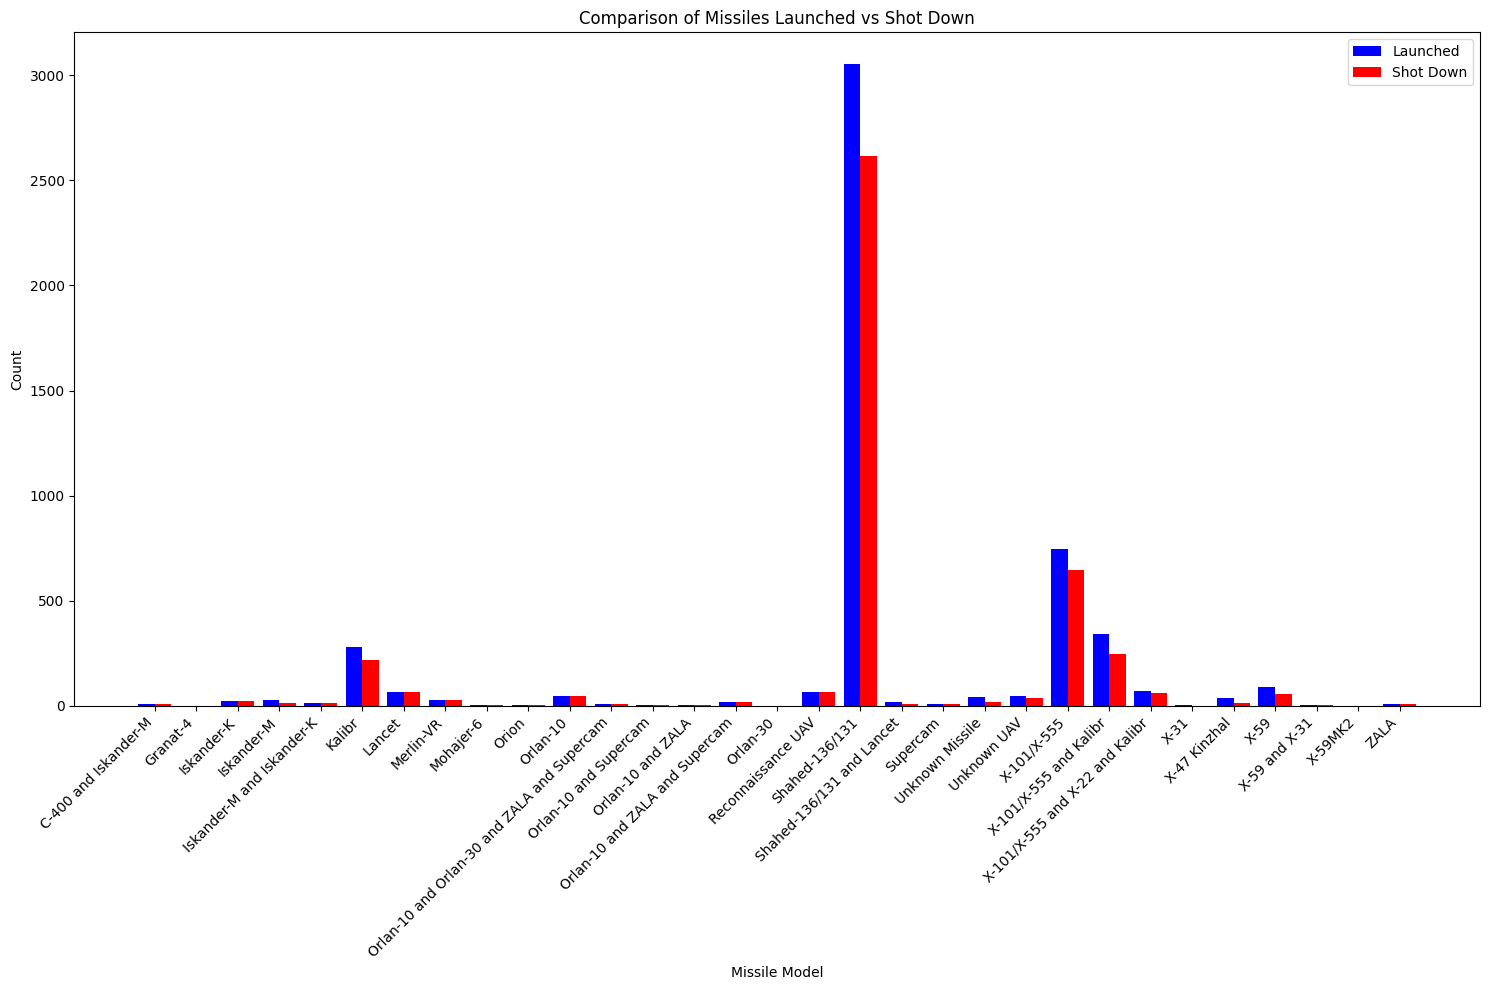

In [ ]:
# Adjusting the code to plot the bars next to each other rather than stacked
plt.figure(figsize=(15, 10))
bar_width = 0.4
index = range(len(missiles_launched_and_shot_down))

# Creating an index for the two sets of bars
index_launched = [i - bar_width/2 for i in index]
index_destroyed = [i + bar_width/2 for i in index]

# Bar for number of times launched
plt.bar(index_launched, missiles_launched_and_shot_down['launched'], bar_width, label='Launched', color='blue')

# Bar for number of times shot down
plt.bar(index_destroyed, missiles_launched_and_shot_down['destroyed'], bar_width, label='Shot Down', color='red')

plt.xlabel('Missile Model')
plt.ylabel('Count')
plt.title('Comparison of Missiles Launched vs Shot Down')
plt.xticks(index, missiles_launched_and_shot_down['model'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


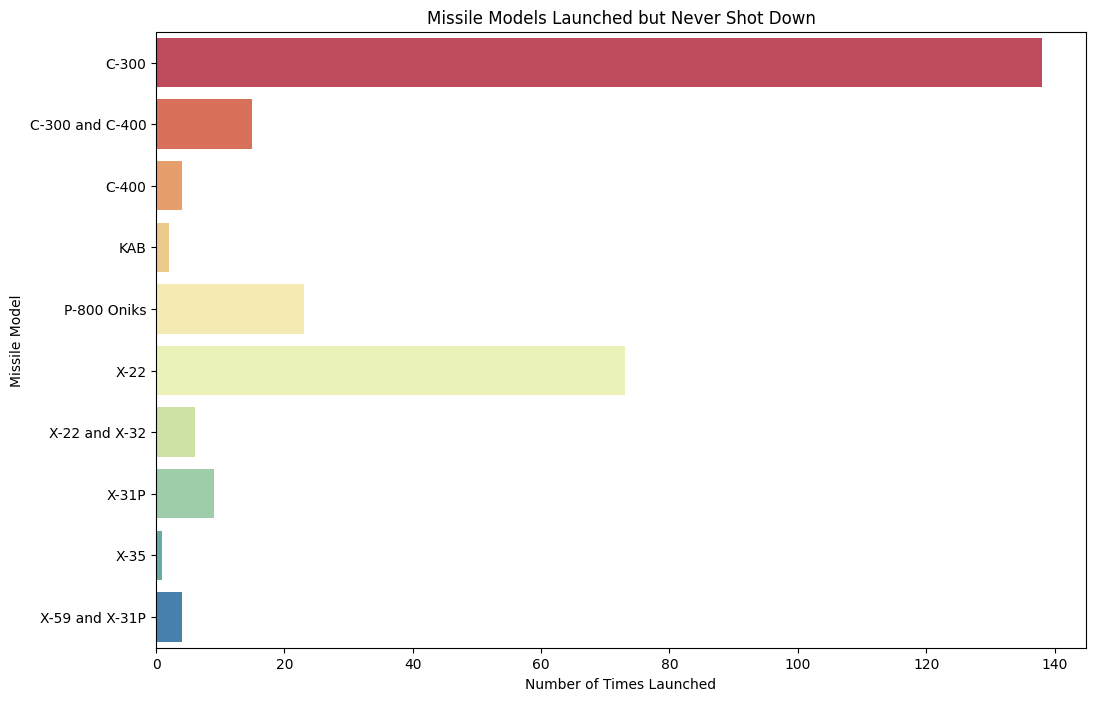

In [ ]:

# Assuming missile_attacks_daily is your DataFrame
# missile_attacks_daily = pd.read_csv('your_dataset.csv')

# Aggregating data for each missile model
missile_summary = missile_attacks_daily.groupby('model').agg({'launched': 'sum', 'destroyed': 'sum'}).reset_index()

# Identifying missile models that have been used (launched) but never been shot down (destroyed count is zero)
missiles_never_shot_down = missile_summary[(missile_summary['launched'] > 0) & (missile_summary['destroyed'] == 0)]['model'].tolist()

missiles_never_shot_down


# Extracting the data for missiles that have been launched but never shot down
missiles_never_shot_down_data = missile_summary[(missile_summary['launched'] > 0) & (missile_summary['destroyed'] == 0)]

# Plotting the missile models that have been launched but never shot down
plt.figure(figsize=(12, 8))
sns.barplot(x='launched', y='model', data=missiles_never_shot_down_data, palette='Spectral')
plt.title('Missile Models Launched but Never Shot Down')
plt.xlabel('Number of Times Launched')
plt.ylabel('Missile Model')
plt.show()


Findings:
  
1. The most common Russian used Models are the Shahed-136, X-59, Kalibr, and X-101. The most frequently used aerial model used, Shahed-136 is a UAV Kamikaze bomber, indicating that Russia has been prioritizing the use of small lethal explosives that can manuever around tricky terrain/buildings to find their targets.
2. Following the March sanctions on companies and individuals that aided the production of the Shahed-136 Suicide UAVs, Russia has only seen the increased use of these drones. This may be an indication that the sanctions were unsuccessful at limiting the production of these drones.
3. For every Reconaissance UAV event, there is approximately a 26.32% chance for a corresponding cruise missile event in the same location within a day. That pecentage increases to 47.37% given a 5 day timeframe.
4. The Russian surface-to-air C-300 missile, and X-22 cruise missiles are the most frequently used missiles used on the attacks in Ukraine that have never been shot down. This may indicate a need for additional anti-missile weapons in Ukraine.